# U.S. Medical Insurance Costs

### We are given the task of analyzing a set of variables corresponding to individual (not personally identifying) traits. The variables given are:

* age: age of primary beneficiary (years)

* sex: insurance contractor gender: (female, male)

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents (integer)

* smoker: Smoking (yes, no)

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance (dollars)
### Given these data, ***can we accurately predict insurance costs?***

In [1]:
import csv 
with open('insurance.csv', 'r', newline='') as insurance_data:
    reader = csv.reader(insurance_data)
    for rows in reader: 
        print(rows)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
['19', 'female', '27.9', '0', 'yes', 'southwest', '16884.924']
['18', 'male', '33.77', '1', 'no', 'southeast', '1725.5523']
['28', 'male', '33', '3', 'no', 'southeast', '4449.462']
['33', 'male', '22.705', '0', 'no', 'northwest', '21984.47061']
['32', 'male', '28.88', '0', 'no', 'northwest', '3866.8552']
['31', 'female', '25.74', '0', 'no', 'southeast', '3756.6216']
['46', 'female', '33.44', '1', 'no', 'southeast', '8240.5896']
['37', 'female', '27.74', '3', 'no', 'northwest', '7281.5056']
['37', 'male', '29.83', '2', 'no', 'northeast', '6406.4107']
['60', 'female', '25.84', '0', 'no', 'northwest', '28923.13692']
['25', 'male', '26.22', '0', 'no', 'northeast', '2721.3208']
['62', 'female', '26.29', '0', 'yes', 'southeast', '27808.7251']
['23', 'male', '34.4', '0', 'no', 'southwest', '1826.843']
['56', 'female', '39.82', '0', 'no', 'southeast', '11090.7178']
['27', 'male', '42.13', '0', 'yes', 'southeast', '39611.7577']
['

### **The data is very clean and well formatted. We can save the variables in each column as individual lists.**

In [5]:
ages = []
sexes = []
bmis = []
num_of_children = []
smoker_status = []
region = []
ind_charges = []
with open('insurance.csv', 'r', newline='') as insurance_data: 
    reader = csv.reader(insurance_data)
    next(reader)
    for rows in reader: 
        ages.append(rows[0])
        sexes.append(rows[1])
        bmis.append(rows[2])
        num_of_children.append(rows[3])
        smoker_status.append(rows[4])
        region.append(rows[5])
        ind_charges.append(rows[6])
print(ages[0:11])
print(len(ages))

['19', '18', '28', '33', '32', '31', '46', '37', '37', '60', '25']
1338


### Here we saved the columns into individual lists for analysis. We can also see the total number of individuals == 1338. At this point I found someone's ("OUYIMIN19") project on Kaggle, and decided to follow their project process to learn more about the functions they used. So, the rest is not my original work, but I decided it would be a good activity to learn more about the functions/libraries they used. 

In [6]:
import numpy
import pandas
import matplotlib.pyplot as matplot
import seaborn 

In [8]:
#sorting the data using pandas
df = pandas.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [12]:
#let's check the rows/values using pandas. Notice that this corroborates with our earlier print statement. 
df.shape

(1338, 7)

In [17]:
#let's see how clean the data really is 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
#no missing values. Let's look up some summary statistics 
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### pandas allows a much more efficient way of calculating summary statistics than our earlier functions. A cursory look seems to suggest that there are no extreme values. For the categorical variables, we can use a function from pandas to get some intial counts. 

In [24]:
print(df.sex.value_counts(),'\n', df.smoker.value_counts(), '\n', df.region.value_counts())

sex
male      676
female    662
Name: count, dtype: int64 
 smoker
no     1064
yes     274
Name: count, dtype: int64 
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


### so it appears that sex is roughly evenly distributed, while the majority are non-smokers and each region is represented roughly equally. 

In [26]:
#we can change the categorical variables to numerical values to improve ease of analysis 
df['sex'] = df['sex'].map({'male':1, 'female':0})
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})
df['region'] = df['region'].map({'southeast': 0, 'southwest':1, 'northwest':2, 'northeast':3})
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
5,31,0,25.740,0,0,0,3756.62160
6,46,0,33.440,1,0,0,8240.58960
7,37,0,27.740,3,0,2,7281.50560
8,37,1,29.830,2,0,3,6406.41070
9,60,0,25.840,0,0,2,28923.13692


In [ ]:
## Exploring the Data
### At this point, "OUYIMIN19" started to use functions to visualize the data. First, a histogram of the age variable is developed. This makes use of a function from the seaborn library. 

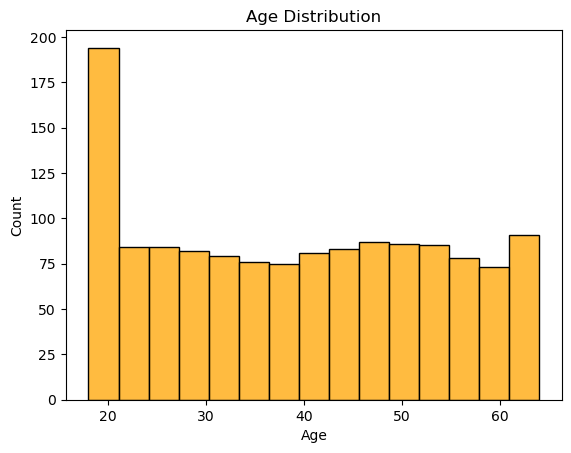

In [35]:
seaborn.histplot(df.age,bins=15, kde=False,color='orange')
matplot.title('Age Distribution')
matplot.xlabel('Age')
matplot.ylabel('Count')
matplot.show()

### so we can see that the age data is roughly uniform with a heavy representation in the lowest bin (looks like roughly 18-22). Considering the count in this range, it could be enough to skew the results.

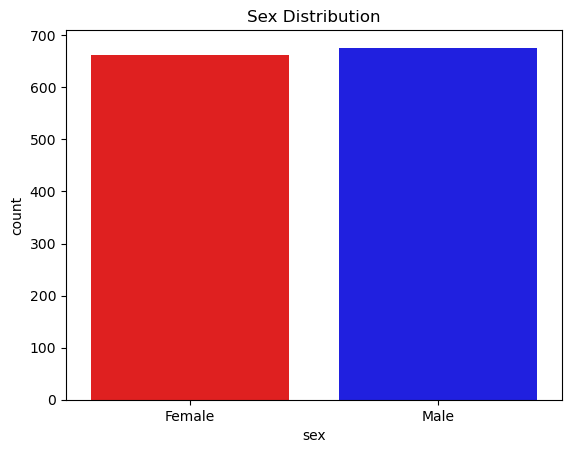

In [46]:
# a simple bar graph could suffice to show the representation among sex (which we already know to be roughly equal from our earlier value_count function)
seaborn.countplot(x = 'sex', data = df, palette = ['red', 'blue'])
matplot.xticks(ticks=[0, 1], labels=['Female', 'Male'])
matplot.title('Sex Distribution')
matplot.show()

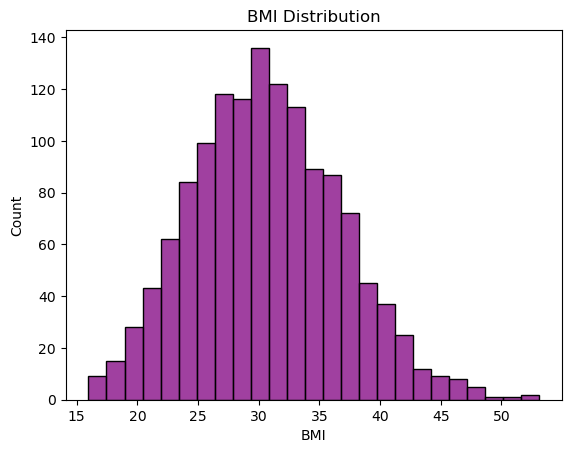

In [54]:
# now we go back to our trusty histogram to visualize the bmi data 
seaborn.histplot(df.bmi,bins=25, kde=False,color='purple')
matplot.title('BMI Distribution')
matplot.xlabel('BMI')
matplot.ylabel('Count')
matplot.show()

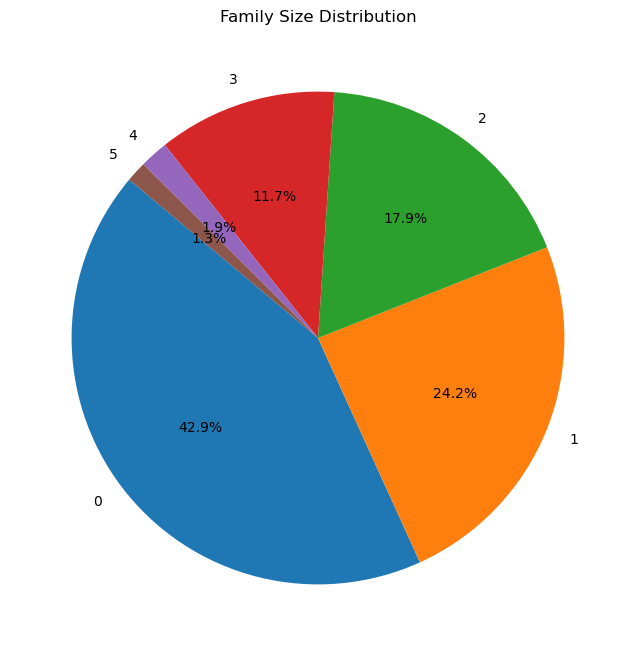

In [53]:
# the data appears approximately normal, with perhaps a slight skew to the right. Now we use a pie chart, since we are bored of bar graphs.


# Calculate counts of categories in the 'Children' Column
children_counts = df['children'].value_counts()

# Create a pie chart
matplot.figure(figsize=(8, 8))  # Optional: Specifies the size of the figure
matplot.pie(children_counts, labels=children_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
matplot.title('Family Size Distribution')

# Show the plot
matplot.show()


In [ ]:
#roughly half of the patients have no children, and very few have greater than 3 children. 
